# good

In [14]:
from utils import calculate_euclidean_distance, calculate_real_width
from skeletonization import skeletonize_mask,create_filled_binary_mask, skeletonize_mask, find_longest_path
import cv2
import fiftyone as fo
import numpy as np

from scipy.spatial.distance import pdist, squareform

from scipy.spatial.distance import pdist, squareform

# def find_furthest_points(contour):
#     """
#     Find the pair of points in the convex hull that are furthest apart.

#     Parameters:
#     - contour: np.ndarray of shape (n_points, 1, 2)

#     Returns:
#     - hull: np.ndarray of shape (m, 2) representing the convex hull points
#     - pair: Tuple containing the two furthest points as np.ndarrays
#     - max_distance: The maximum Euclidean distance between the pair
#     """
#     # Compute the convex hull
#     hull = cv2.convexHull(contour, returnPoints=True).reshape(-1, 2)
    
#     # Ensure there are at least two points in the hull
#     if len(hull) < 2:
#         raise ValueError("Convex hull must contain at least two points.")
    
#     # Compute pairwise distances
#     distances = pdist(hull, metric='euclidean')
    
#     # Convert to a square distance matrix
#     distance_matrix = squareform(distances)
    
#     # Find the indices of the maximum distance
#     i, j = np.unravel_index(np.argmax(distance_matrix), distance_matrix.shape)
    
#     # Retrieve the pair of points
#     pair = (hull[i], hull[j])
    
#     # Retrieve the maximum distance
#     max_distance = distance_matrix[i, j]
    
#     return hull, pair, max_distance




def process_segmentations(segmentation_path):
    """
    Process the segmentations from the TXT file, calculate the minimum enclosing circle for each prawn.
    """
    segmentations = []
    # skeletons=[]
    # hulls=[]
    # # skeletons_straight=[]
    # # skeletons_straight_2=[]
    # seg_closeds=[]
    # skeletons_2=[]
    # box_diagonal=[] 
    boxes=[]
    # masks=[]
    # convexs=[]
    # cont_pair=[]






    
    # Open the segmentation file and process each line
    with open(segmentation_path, 'r') as file:
        for line in file:
            coords = [float(x) for x in line.strip().split()]
            coords_array = np.array(coords).reshape(-1, 2)
            

            
            binary_mask_no = create_filled_binary_mask(coords_array, 360, 640, gaussian_blur=False) 
            
            if np.sum(binary_mask_no) == 0:   
                continue





            # binary_dilated = cv2.dilate(binary_mask_no, np.ones((15, 15), np.uint8), iterations=1)     


            # #contour dilated
            # contures_dil, _ = cv2.findContours(binary_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    


            # prawn_conture_dil = max(contures_dil, key=cv2.contourArea)

            # coords_contour_dil = np.column_stack(prawn_conture_dil).flatten()

            # normalized_coords_bin=[(coords_contour_dil[i]/640, coords_contour_dil[i+1]/360) for i in range(0, len(coords_contour_dil), 2)]  # Extract points (x, y)


            # masks.append(fo.Polyline(
            #     points=[normalized_coords_bin],
            #     closed=True,
            #     filled=False,
            # ))


            
            # thinned_2=skeletonize_mask(binary_mask_no)

            # # skeleton = skeletonize_mask(binary_mask)
            # skeleton_2 = thinned_2
            # skeleton_coords_2 = np.column_stack(np.nonzero(skeleton_2))
            # normalized_coords_2,max_length_2 = find_longest_path(skeleton_coords_2,(360,640),(2988,5312))

            # normalized_coords_2 = [(x, y) for y, x in normalized_coords_2]  # Convert to (y, x) format

            # #only the first and last points of the skeleton
            # normalized_coords_straight_2 = [normalized_coords_2[0], normalized_coords_2[-1]]  





             
            #convex hull diameter
            contures, _ = cv2.findContours(binary_mask_no, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            
            prawn_conture = max(contures, key=cv2.contourArea) 
            
        

            # Compute the minimum area rectangle enclosing the shrimp
            rect = cv2.minAreaRect(prawn_conture)
            box_points = cv2.boxPoints(rect)
            # box_points = np.int0(box_points)

            original_size = (640, 360)
            new_size = (5312, 2988)

            # Scaling factors
            scale_x = new_size[0] / original_size[0]  # 5312 / 640
            scale_y = new_size[1] / original_size[1]  # 2988 / 640

            # print(f"Scale X: {scale_x}, Scale Y: {scale_y}")  # Should both be 8.3


            # pair, max_length_cont=find_furthest_points(prawn_conture)
            # if len(pair) < 2:
            #     raise ValueError(f"Expected pair to contain at least two points, but got {len(pair)}")
                
            # normalized_pair= [(pair[0][0]/640, pair[0][1]/360), (pair[1][0]/640, pair[1][1]/360)]

            # cont_pair.append(fo.Polyline(
            #     points=[normalized_pair],
            #     closed=False,
            #     filled=False,
            #     max_length=max_length_cont
            # ))



            # scaled_pair= [(pair[0][0] * scale_x, pair[0][1] * scale_y), (pair[1][0] * scale_x, pair[1][1] * scale_y)]
               
            # max_length_cont=np.linalg.norm(np.array(scaled_pair[0])-np.array(scaled_pair[1]))




            box_points_scaled = np.array([(point[0] * scale_x, point[1] * scale_y) for point in box_points])

            rotated_rect_width = rect[1][0] * scale_x
            rotated_rect_height = rect[1][1] * scale_y

# The max length of the rectangle is the longer side
            max_length_box = max(rotated_rect_width, rotated_rect_height)

            # print(f"Rotated Rect Width: {rotated_rect_width}, Height: {rotated_rect_height}, Max Length Box: {max_length_box}")

        
            # Convert theta from degrees to radians for FiftyOne
            theta_radians = np.deg2rad(rect[2])
            # normalized_bounding_box = [(box_points[i][0]/640, box_points[i][1]/640) for i in range(0, len(box_points))] 
            
            # image_center_x = 640 / 2

            # xc_adjusted = rect[0][0] - image_center_x

            # Extract points (x, y) 
            box=fo.Polyline.from_rotated_box(
                xc=rect[0][0] ,
                yc=rect[0][1],
                w=rect[1][0],
                h=rect[1][1],
                theta =theta_radians,
                frame_size=(640, 360)

            )


            boxes.append(box)


            # hull_points = cv2.convexHull(prawn_conture, returnPoints=True)

            
#             points,furthest_pair, max_length_cont = find_furthest_points(prawn_conture)

# # Scaling ffurthest_pair, max_length_cont = find_furthest_points(prawn_contour)

#             # If you need to scale the points and distance
#             original_size = (640, 360)
#             new_size = (5312, 2988)

#             scale_x = new_size[0] / original_size[0]
#             scale_y = new_size[1] / original_size[1]

#             scaled_pair = [(p[0] * scale_x, p[1] * scale_y) for p in furthest_pair]


#             #eucledian distance between scaled pair
#             max_distance = np.linalg.norm(np.array(scaled_pair[0])-np.array(scaled_pair[1]))


#             # The result is max_distance (in pixels) in the 5312x2988 image


#             normalzied_points_hull = [(point[0]/640, point[1]/360) for point in points]  # Extract points (x, y)

#             hull=fo.Polyline(
#                 points=[[(point[0]/640, point[1]/360) for point in furthest_pair]],
#                 closed=False,
#                 filled=False,
#                 max_length=max_distance
#             )

           
#             hull_convex=fo.Polyline(
#                 points=[normalzied_points_hull],
#                 closed=False,
#                 filled=False,
#                 max_length=max_distance
#             )
               
               
#             convexs.append(hull_convex)





                    

        # skeleton_straight=fo.Polyline(
        #     points=[normalized_coords_straight],
        #     closed=False,
        #     filled=False,
        #     max_length=max_length
        # )
        # skeletons_straight.append(skeleton_straight)

            # skeleton_straight_2=fo.Polyline(
            #     points=[normalized_coords_straight_2],
            #     closed=False,
            #     filled=False,
            #     max_length=max_length_2,
                
            # )
            # skeletons_straight_2.append(skeleton_straight_2)




            # hulls.append(hull)

            # skeleton=fo.Polyline(
            #     points=[normalized_coords],
            #     closed=False,
            #     filled=False,
            #     max_length=max_length
            # )

            # skeletons.append(skeleton)
            
            # skeleton_2=fo.Polyline( 
            #     points=[normalized_coords_2],
            #     closed=False,
            #     filled=False,
            #     max_length=max_length_2)
            # skeletons_2.append(skeleton_2)
              # Convert the line to a list of floats
            normalzied_points = [(coords[i]/640, coords[i + 1]/360) for i in range(0, len(coords), 2)]  # Extract points (x, y)
            # points = [Point(x*5312, y*2988) for x, y in normalzied_points] 
            

            scaled_contour = []
            for point in prawn_conture:
                scaled_x = int(point[0][0] * scale_x)
                scaled_y = int(point[0][1] * scale_y)
                scaled_contour.append([[scaled_x, scaled_y]])

            scaled_contour = np.array(scaled_contour, dtype=np.int32)

             # Convert to Point objects    
            # Calculate the minimum enclosing circle (center and radius)
            center, radius = cv2.minEnclosingCircle(scaled_contour)



            diameter = radius * 2


            #center in 640x360
            center_640 = (center[0] / scale_x, center[1] / scale_y)
        

            segmentation = fo.Polyline(
                points=[normalzied_points],
                closed=True,
                filled=False,
                diameter=diameter,
                center=center_640,
                max_length_box=max_length_box,
                rect=rect,
                # max_length_cont=max_length_cont
            )

            #smooth segmentation  wirh closing
            # seg_closed=fo.Polyline(
            #     points=[normalized_coords_bin],
            #     closed=True,
            #     filled=False,
            #     max_length=max_length
            # )

            # seg_closeds.append(seg_closed)                


            segmentations.append(segmentation)

            
            # # Calculate diagonal of the rotated rectangle
            # rect_diagonal = np.linalg.norm(np.array(box_points_scaled[0]) - np.array(box_points_scaled[2]))

            # # Compare with the convex hull furthest distance
            # print(f"Rect Diagonal: {rect_diagonal}")
            # print(f"Convex Hull Max Distance: {max_distance}")
            # if rect_diagonal < max_distance:
            #     print("Unexpected: Rect diagonal is smaller than hull's furthest distance.")




                     # Store the segmentation information (center, radius, and diameter)

    return segmentations,boxes

In [2]:
import fiftyone.core.labels as fol
from tqdm import tqdm
import fiftyone as fo
import os

def process_images(image_paths, prediction_folder_path, dataset,tag):
    print("Processing images...")
    
    """
    Processes images by matching segmentation with bounding boxes and calculating prawn sizes.
    """
    for image_path in tqdm(image_paths):
        # filename = os.path.splitext(os.path.basename(image_path))[0]
        

           
        # prediction_txt_path = os.path.join(prediction_folder_path, f"{os.path.basename(image_path).split('.')[0]}_segmentations.txt")

        core_name = os.path.splitext(os.path.basename(image_path))[0]

        # Construct the path to the corresponding segmentation file



        #check if txt exist

        if not os.path.exists(os.path.join(prediction_folder_path, f"{core_name}_segmentations.txt")):
            print(f"No segmentation file found for {core_name}")
            continue



        prediction_txt_path = os.path.join(prediction_folder_path, f"{core_name}_segmentations.txt")

        # core_name=filename.split('.')[0]
        # # Construct the path to the prediction (segmentation) file
        # prediction_txt_path = os.path.join(prediction_folder_path, f"{core_name}_segmentations.txt")
        # if not os.path.exists(prediction_txt_path):
        #     print(f"No segmentation file found for {filename}")
        #     continue


        # Parse the segmentations to get the minimum enclosing circles
        segmentations,boxes= process_segmentations(prediction_txt_path)

        # Save the modified image (with circles drawn)

        # Create a new sample for FiftyOne
        sample = fo.Sample(filepath=image_path)

        

        # Iterate over each bounding box in the filtered data
        sample["segmentations"] = fol.Polylines(polylines=segmentations)

        # sample["skeletons"] = fol.Polylines(polylines=skeletons)


        # sample["skeletons_straight"] = fol.Polylines(polylines=skeletons_straight)

        # sample['seg_closeds']=fol.Polylines(polylines=seg_closeds)
        
        # sample['skeletons_no_smooth']=fol.Polylines(polylines=skeletons_2)

        # sample["skeletons_straight_no_smooth"] = fol.Polylines(polylines=skeletons_straight_2)

        sample['boxes']=fol.Polylines(polylines=boxes)

        # Add the processed sample to the FiftyOne dataset
        sample.tags.append(tag)
        dataset.add_sample(sample)

In [55]:
import math
import cv2

class ObjectLengthMeasurer:
    def __init__(self, image_width, image_height, horizontal_fov, vertical_fov, distance_mm):
        self.image_width = image_width
        self.image_height = image_height
        self.horizontal_fov = horizontal_fov
        self.vertical_fov = vertical_fov
        self.distance_mm = distance_mm
        self.scale_x, self.scale_y = self.calculate_scaling_factors()
        self.to_scale_x=image_width/640
        self.to_scale_y=image_height/360



    def calculate_scaling_factors(self):
        fov_x_rad = math.radians(self.horizontal_fov)
        fov_y_rad = math.radians(self.vertical_fov)
        scale_x = (2 * self.distance_mm * math.tan(fov_x_rad / 2)) / self.image_width
        scale_y = (2 * self.distance_mm * math.tan(fov_y_rad / 2)) / self.image_height
        # print(f"Scale X: {scale_x}, Scale Y: {scale_y}")  # Debugging
        return scale_x, scale_y

    def normalize_angle(self, angle):
        if angle < -45:
            angle += 90
        normalized = abs(angle)
        # print(f"Original Angle: {angle}, Normalized Angle: {normalized}")  # Debugging
        return normalized

    def compute_length(self, predicted_box_length, angle_deg):
        angle_rad = math.radians(angle_deg)
        combined_scale = math.sqrt((self.scale_x * math.cos(angle_rad)) ** 2 + 
                               (self.scale_y * math.sin(angle_rad)) ** 2)
        length_mm = predicted_box_length * combined_scale
        # print(f"Predicted Length (pixels): {predicted_box_length}, Length (mm): {length_mm}")  # Debugging
        return length_mm

    def measure_object_length(self, rect):
        angle = rect[-1]
        normalized_angle = self.normalize_angle(angle)
        predicted_box_length = max(rect[1])*8.3
    
        length_mm = self.compute_length(predicted_box_length, normalized_angle)

        if length_mm > 130 and length_mm < 250:
            print(f'angle: {angle}, normalized_angle: {normalized_angle}')
            print(f'scaling factors: {self.scale_x}, {self.scale_y}') 
            print(f"Object Length: {length_mm:.2f}" )  # Debugging


        return length_mm, normalized_angle

# Usage Example with Debugging


# # Assuming you have detected_contours from some method
# measurements = []
# for contour in detected_contours:
#     length_mm, angle = measurer.measure_object_length(contour)
#     measurements.append((length_mm, angle))
#     print(f"Object Length: {length_mm:.2f} mm at angle {angle:.2f}°")


def process_detection_by_circle(segmentation, sample,i,dataframe):
    """
    Process the prawn detection based on the enclosing circle's diameter.
    Update the filtered dataframe with the real-world size of the prawn.
    """
    poly=segmentation

    if 'right' in str(sample.tags[0]):
        height_mm =700-30
        focal_length = 23.64     
    else:
        height_mm=410-30
        focal_length=24.72
    
    image_width = 5312
    image_height = 2988
    diagonal_image_size = math.sqrt(image_width ** 2 + image_height ** 2)
    horizontal_fov = 75.2
    vertical_fov = 46
    diagonal_fov = 84.6 
   
    predicted_box_length=poly['max_length_box']
    rect=poly['rect'] 

  




    # normalized_angle=normalize_angle(angle)
    # scale_x, scale_y = calculate_scaling_factors(
    #     horizontal_fov, vertical_fov, image_width, image_height, height_mm
    # )
    
    # object_length = compute_object_length(predicted_box_length, normalized_angle, scale_x, scale_y)

    
    # if -15 <= angle <= 15 or abs(angle) > 165:  # Object is close to horizontal (aligned with the horizontal axis)
    #     print('horizontal', angle)
    #     FOV_width = 2 * height_mm * math.tan(math.radians(horizontal_fov / 2))
    #     object_length = FOV_width * predicted_box_length / image_width  # Use the width of the image (5312)

    # elif 75 <= abs(angle) <= 105:  # Object is close to vertical (aligned with the vertical axis)
    #     print('vertical', angle)
    #     FOV_height = 2 * height_mm * math.tan(math.radians(vertical_fov / 2))
    #     object_length = FOV_height * predicted_box_length / image_height  # Use the height of the image (2988)

    # else:  # Diagonal case (any orientation between horizontal and vertical)
    #     print('diagonal', angle)
    #     FOV_diagonal = 2 * height_mm * math.tan(math.radians(diagonal_fov / 2))
    #     object_length = FOV_diagonal * predicted_box_length / diagonal_image_size

    
    
    
    
    measurer = ObjectLengthMeasurer(
        image_width=5312,
        image_height=2988,
        horizontal_fov=75.2,
        vertical_fov=46.0,
        distance_mm=height_mm  # Example distance
    )

    object_length, normalized_angle = measurer.measure_object_length(rect)
    
    
    
    
    

    if object_length < 125 or object_length > 220:
        
        return poly

    image_path = sample.filepath.split('\\')[-1]

    if object_length < 165:
        best_true_length = 143
        if object_length < 143 and 'smaller than 143mm' not in sample.tags:

            print('smaller than 143mm',object_length)
            sample.tags.append('smaller than 143mm')
        if object_length < 143:      
            dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'smaller'] = 'yes'
        else:
            dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'smaller'] = 'no'   

    else:
        best_true_length = 180
        if object_length < 180 and 'smaller than 180mm' not in sample.tags:

            print('smaller than 180mm',object_length)
            sample.tags.append('smaller than 180mm')

        if object_length < 180:
            dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'smaller'] = 'yes'
        
        else:
            dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'smaller'] = 'no'

    # for true_length in [143, 180]:
        
    

       
    #     error_percentage_hull_fov = abs(hull_length_fov - true_length) / true_length * 100
        


    #     if error_percentage_hull_fov < min_error_percentage:
    #         min_error_percentage = error_percentage_hull_fov
    #         best_true_length = true_length

    if best_true_length == 143:
        height_mm = height_mm
    else:
        height_mm = height_mm - 15

    measurer = ObjectLengthMeasurer(
        image_width=5312,
        image_height=2988,
        horizontal_fov=75.2,
        vertical_fov=46.0,
        distance_mm=height_mm  # Example distance
    )

    object_length, normalized_angle = measurer.measure_object_length(rect)

  
    # print(f"height_mm: {height_mm}, tag: {tag}")

    # focal_length = 24.22  # Camera focal length
    pixel_size = 0.00716844  # Pixel size in mm

    

    # fov=84.6
    # FOV_width=2*height_mm*math.tan(math.radians(fov/2))



    # # Get the diameter of the circle in pixels
    # predicted_diameter_pixels = poly['diameter']


    # predicted_skeleton_length=poly['max_length_skeleton']  

    # predicted_hull_length=poly['max_length_hull']

     
    predicted_box_length=poly['max_length_box']

    # predicted_cnt_pair=poly['max_length_cont']  
    
    center=poly['center']


    


    #add true lenght to datafram
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'true_length'] = best_true_length


    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'center'] = str(center)

    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Hull_Length_pixels'] = predicted_hull_length
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Diameter_pixels'] = predicted_diameter_pixels
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Skeleton_Length_pixels'] = predicted_skeleton_length
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Box_Length_pixels'] = predicted_box_length



    # Calculate the real-world prawn size using the box
    focal_box = calculate_real_width(focal_length, height_mm, predicted_box_length, pixel_size) 


    # focal_hull = calculate_real_width(focal_length, height_mm, predicted_hull_length, pixel_size)    
    # # Calculate the real-world prawn size using the enclosing circle's diameter
    # focal_MEC = calculate_real_width(focal_length, height_mm, predicted_diameter_pixels, pixel_size)

    # focal_ske = calculate_real_width(focal_length, height_mm, predicted_skeleton_length, pixel_size)    


    # Update the filtered dataframe with the real-world size of the prawn
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Focal_Box'] = focal_box
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Focal_Hull'] = focal_hull
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Focal_MEC'] = focal_MEC
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Focal_Skeleton'] = focal_ske



    # hull_length_fov=FOV_width*predicted_hull_length/5312
    # diameter_length_fov=FOV_width*predicted_diameter_pixels/5312
    # skeleton_length_fov=FOV_width*predicted_skeleton_length/5312

  

    # cnt_pair=FOV_width*predicted_cnt_pair/5312

    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Hull_Length_fov'] = hull_length_fov
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Diameter_fov'] = diameter_length_fov
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Skeleton_Length_fov'] = skeleton_length_fov
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Box_Length_fov'] = object_length

    # error_percentage_cnt_pair = abs(cnt_pair - best_true_length) / best_true_length * 100


    # error_percentage_hull_fov = abs(hull_length_fov - best_true_length) / best_true_length * 100

    # error_percentage_skeleton_fov = abs(skeleton_length_fov - best_true_length) / best_true_length * 100  


    error_percentage_box_fov = abs(object_length - best_true_length) / best_true_length * 100


    # error_percentage_MEC_fov = abs(diameter_length_fov - best_true_length) / best_true_length * 100


    # MAE_hull_fov = abs(hull_length_fov - best_true_length)
    # MAE_skeleton_fov = abs(skeleton_length_fov - best_true_length)
    MAE_box_fov = abs(object_length - best_true_length)
    # MAE_MEC_fov = abs(diameter_length_fov - best_true_length)

    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'MAE_Hull_fov'] = MAE_hull_fov
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'MAE_Skeleton_fov'] = MAE_skeleton_fov

    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'MAE_MEC_fov'] = MAE_MEC_fov

    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'MAE_Box_fov'] = MAE_box_fov
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] ==image_path), 'Error_percentage_Box_fov'] = error_percentage_box_fov
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_Hull_fov'] = error_percentage_hull_fov
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_Skeleton_fov'] = error_percentage_skeleton_fov
    error_percentage_box_focal = abs(focal_box - best_true_length) / best_true_length * 100
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_Box_focal'] = error_percentage_box_focal
    
    #focal mae box
    focal_MAE_box = abs(focal_box - best_true_length)
    dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'MAE_Box_focal'] = focal_MAE_box

    #

    # # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_MEC_fov'] = error_percentage_MEC_fov

    # error_percentage_hull_focal = abs(focal_hull - best_true_length) / best_true_length * 100

    # error_percentage_skeleton_focal = abs(focal_ske - best_true_length) / best_true_length * 100


    # error_percentage_MEC_focal = abs(focal_MEC - best_true_length) / best_true_length * 100

    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_Hull_focal'] = error_percentage_hull_focal
    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_Skeleton_focal'] = error_percentage_skeleton_focal


    # dataframe.loc[(dataframe['index'] == i) & (dataframe['image_path'] == image_path), 'Error_percentage_MEC_focal'] = error_percentage_MEC_focal  





    closest_detection_label = f'index:{i} ,true length: {best_true_length:.2f}mm,  MPError_hull: {error_percentage_box_fov:.2f}%, pred length: {object_length:.2f}mm, MAE: {MAE_box_fov:.2f}mm'
    # Update the filtered dataframe with the real-world size of the prawn



    if error_percentage_box_fov > 25 and f'>25% error' not in sample.tags:

        sample.tags.append(f'>25% error')

    elif error_percentage_box_fov > 15 and f'15-25% error' not in sample.tags:

        sample.tags.append(f'15-25% error')

    elif error_percentage_box_fov > 10  and f'10-15% error' not in sample.tags:

        sample.tags.append(f'10-15% error')

    elif error_percentage_box_fov < 10 and f'5-10% error' not in sample.tags:

        sample.tags.append(f'5-10% error')
    
    elif error_percentage_box_fov < 5 and f'<5% error' not in sample.tags:

        sample.tags.append(f'<5% error')


    if error_percentage_box_fov<5 and error_percentage_box_fov > best_true_length and f'very good' not in sample.tags:
        sample.tags.append('very good')





    poly.label = closest_detection_label 
    return poly
  



In [56]:
molt_right_image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\right\color_images"

molt_square_image_path=r"c:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\square\color_images"

molt_prediction_right=r'C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\right\segmentations'

molt_prediction_sqaure=r'c:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\square\segmentations'


import pandas as pd


import fiftyone as fo
dataset = fo.Dataset("molt", overwrite=True,persistent=True)

# Load the dataset
right_image_paths = [os.path.join(molt_right_image_path, image) for image in os.listdir(molt_right_image_path) if image.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

square_image_paths = [os.path.join(molt_square_image_path, image) for image in os.listdir(molt_square_image_path) if image.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

for molt_prediction in [molt_prediction_right,molt_prediction_sqaure]:
    prediction_paths_text = [os.path.join(molt_prediction, txt) for txt in os.listdir(molt_prediction) if txt.endswith('.txt')]




    tag = molt_prediction.split('\\')[-2]

    if 'right' in molt_prediction:
        image_paths = right_image_paths
        process_images(image_paths, molt_prediction, dataset, tag)
    else:
        image_paths = square_image_paths
        process_images(image_paths, molt_prediction, dataset, tag)

# Process segmentations
dataframe = pd.DataFrame(columns=['image_path', 'index', 'pond'])

df_clean=pd.read_csv(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\samples_index.csv')

df_seg_error=pd.read_csv(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\molt_seg_error.csv')

df_seg_error_other=pd.read_csv(r"C:\Users\gbo10\OneDrive\research\thesis and paper\molt_seg_error.csv")


# df_seg_error=pd.concat([df_seg_error,df_seg_error_other])

for sample in dataset:

    tag = sample.tags[0]    
    # Access the polylines for each sample
    for i, segmentation in enumerate(sample["segmentations"].polylines):


        if sample.filepath.split('\\')[-1] in df_clean['sample'].values and i in df_clean.loc[df_clean['sample'] == sample.filepath.split('\\')[-1], 'index'].values:
            print(f"Skipping not prawm {sample.filepath} index {i}")
            continue
        if sample.filepath.split('\\')[-1] in df_seg_error_other['image_path'].values and i in df_seg_error_other.loc[df_seg_error_other['image_path'] == sample.filepath.split('\\')[-1], 'index'].values:
            print(f"Skipping seg error {sample.filepath} index {i}")
            continue
        if sample.filepath.split('\\')[-1] =='undistorted_GX010191_45_489.jpg' or sample.filepath.split('\\')[-1] =='undistorted_GX010191_27_215.jpg' or sample.filepath.split('\\')[-1] =='undistorted_GX010191_104_1301.jpg' or sample.filepath.split('\\')[-1]=='undistorted_GX010194_21_312.jpg' or sample.filepath.split('\\')[-1] =='undistorted_GX010191_26_199.jpg':
            print(f"Skipping image error {sample.filepath} index {i}")
            continue
        image_path = sample.filepath.split('\\')[-1]

        dataframe = dataframe._append({'image_path': image_path, 'index': i, 'pond': tag}, ignore_index=True)
        # Process and modify the segmentation
        updated_segmentation = process_detection_by_circle(segmentation, sample, i, dataframe)

        # Save the updated segmentation back into the sample
        sample["segmentations"].polylines[i] = updated_segmentation

        sample.save()

dataframe.to_csv('molt.csv')
session = fo.launch_app(dataset, port=5152)

Processing images...


100%|██████████| 66/66 [00:02<00:00, 28.99it/s]


Processing images...


100%|██████████| 56/56 [00:02<00:00, 26.55it/s]


Skipping not prawm C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\right\color_images\undistorted_GX010191_100_1250.jpg index 0
Skipping seg error C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\right\color_images\undistorted_GX010191_100_1250.jpg index 1
Skipping seg error C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\good\640360\right\color_images\undistorted_GX010191_100_1250.jpg index 2
angle: 84.64417266845703, normalized_angle: 84.64417266845703
scaling factors: 0.19426561011476987, 0.1903601920083234
Object Length: 142.98
smaller than 143mm 142.98050346081868
angle: 84.64417266845703, normalized_angle: 84.64417266845703
scaling factors: 0.19426561011476987, 0.1903601920083234
Object Length: 142.98
angle: 67.69379425048828, normalized_angle: 67.69379425048828
scaling factors: 0.19426561011476987, 0.1903601920083234
Object Length: 140.41
smaller than 143mm 140.4087096471602
angle: 67.693794


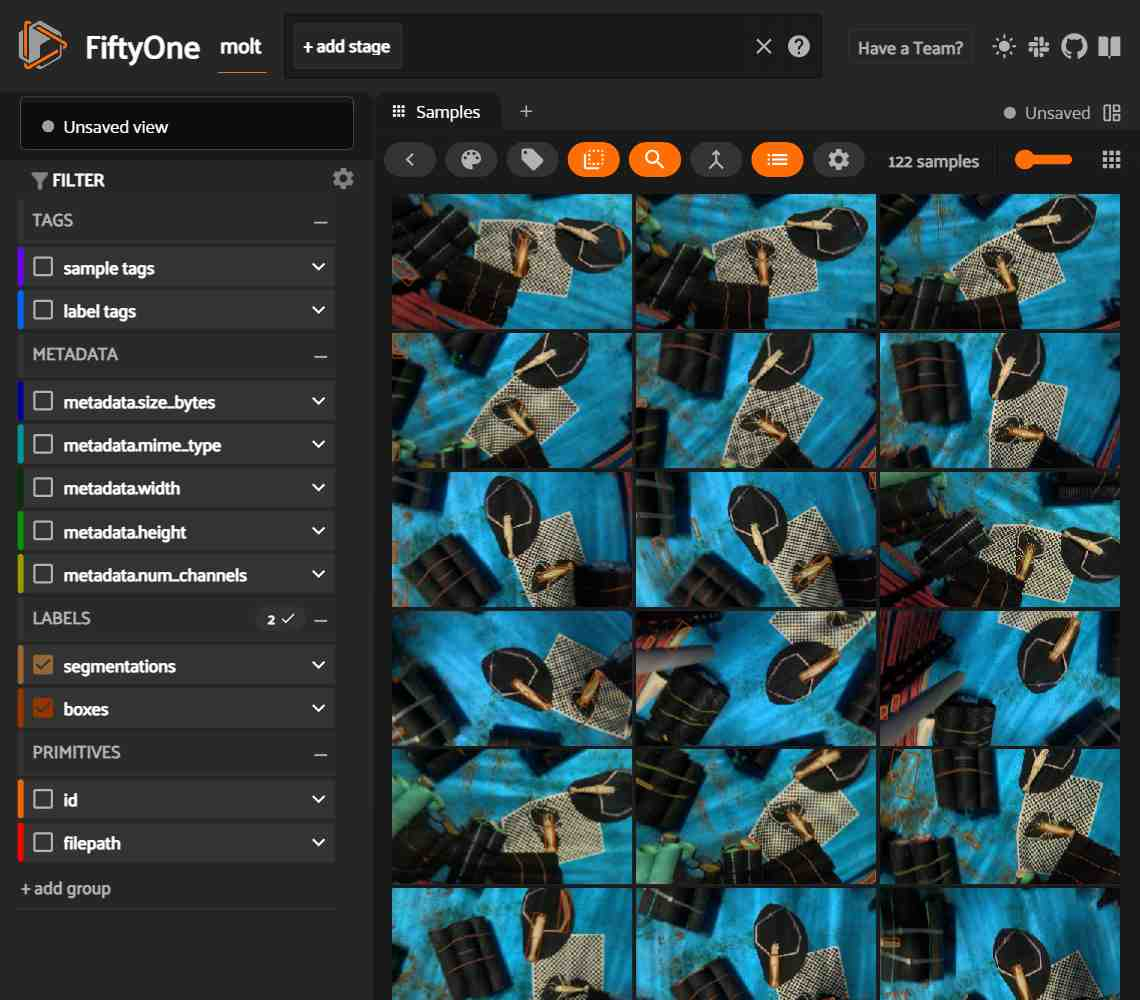

In [6]:
import fiftyone as fo

dataset=fo.load_dataset("molt")

session = fo.launch_app(dataset, port=5152)

In [ ]:

# Load the dataset


for sample in dataset:
    for i, segmentation in enumerate(sample["segmentations"].polylines):
        print(f"index: {i}, label: {segmentation.tags}")

In [81]:
print(session.view)

None


In [80]:


dataframe_seg=pd.DataFrame(columns=['image_path','index'])
from tqdm import tqdm
# 
for sample in view:
    for i, segmentation in enumerate(sample["segmentations"].polylines):
        if segmentation.label is not None:
            print(len(segmentation.tags))
            if len(segmentation.tags)>0:
                
                if segmentation.tags[0]=='under' or segmentation.tags[0]=='over':
                    print(f"under or over {sample.filepath} index {i}")
                    dataframe_seg=dataframe_seg._append({'image_path':sample.filepath.split('\\')[-1],'index':i},ignore_index=True)

            
dataframe_seg.to_csv('molt_seg_error.csv')

TypeError: 'NoneType' object is not iterable

In [1]:
import ast
import folium
from folium.plugins import MarkerCluster    
import pandas as pd
import plotly.express as px

# Read the data

# samples_index = pd.read_csv('samples_index.csv')  # Ensure this is read correctly

# # Update the 'not' column based on samples_index
# for _, sample in samples_index.iterrows():
#     df.loc[(df['image_path'] == sample['sample']) & (df['index'] == sample['index']), 'not'] = 'not'
# df.to_csv('molt_CLEAN.csv')

# # Clean the data
# df_clean = df[df['not'] != 'not']
# df_clean = df_clean.dropna()


df = pd.read_csv('molt.csv')
df_clean = df.dropna()

df_clean.loc[(df['image_path'] == 'undistorted_GX010191_43_1353.jpg') & (df['index'] == 6)] = None
#undistorted_GX010194_21_312.jpg

df_clean.loc[(df['image_path'] == 'undistorted_GX010194_21_312.jpg') & (df['index'] == 1)] = None


df_clean.dropna(inplace=True)

df_clean.loc[:, 'error_Box_fov'] = df['Box_Length_fov'] - df['true_length']
df_clean.loc[:, 'error_Box_focal'] = df['Focal_Box'] - df['true_length']
#percentage error with sign
df_clean.loc[:, 'sign_Error_percentage_Box_fov'] = (df['Box_Length_fov'] - df['true_length']) / df['true_length'] * 100


# Extract center_x and center_y from the 'center' column
df_clean['center_x'] = df_clean['center'].apply(lambda x: ast.literal_eval(x)[0])
df_clean['center_y'] = df_clean['center'].apply(lambda x: ast.literal_eval(x)[1])


# Filter the DataFrame for specific conditions
# df_positive = df_clean[(df_clean['Box_Length_fov'] > df_clean['true_length'])]
df_clean.loc[df_clean['pond']=='right','pond']=700
df_clean.loc[df_clean['pond']=='square','pond']=410

# Create a new DataFrame for visualization with necessary columns
df_visual = df_clean[['center_x', 'center_y', 'Error_percentage_Box_fov', 'image_path', 'index', 'pond', 'MAE_Box_fov','error_Box_fov','sign_Error_percentage_Box_fov']].copy()

# Ensure image paths are correct
df_visual['image_path'] = df_visual['image_path'].apply(lambda x: x.replace('\\', '/'))


# Adjust center_y coordinate to be opposite to the image
df_visual['center_y'] = 360 - df_visual['center_y']

symbols = {'right': 'circle', 'square': 'square'}
# Generate scatter plots
for error in ['Error_percentage_Box_fov', 'MAE_Box_fov','sign_Error_percentage_Box_fov']:
    for pond in [700, 410]:
        print(f"Plotting {error} for {pond}...")

        



        # Create an interactive scatter plot using plotly
        fig = px.scatter(df_visual[df_visual['pond'] == pond], 
                        symbol='pond',
                        symbol_map=symbols,
                            x='center_x', 
                            y='center_y', 
                            color=error,
                            hover_data=['image_path', 'index'],
                            color_continuous_scale='RdYlGn_r', 
                            title=f'{error} of Hull Length Prediction',)
        #
        # Customize the color bar
        fig.update_layout(coloraxis_colorbar=dict(title=error))
        fig.update_traces(marker=dict(size=10))
        #tighten the layout
        #fix legend overlapping
        fig.update_layout(legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ))    

        fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
        #save the plot as png
        fig.write_image(f'{error}_{pond}.png')
        # Show the plot
        fig.show()

C:\Users\gbo10\AppData\Local\Temp\ipykernel_35108\1391189737.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)
C:\Users\gbo10\AppData\Local\Temp\ipykernel_35108\1391189737.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'error_Box_fov'] = df['Box_Length_fov'] - df['true_length']
C:\Users\gbo10\AppData\Local\Temp\ipykernel_35108\1391189737.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Plotting Error_percentage_Box_fov for 700...


Plotting Error_percentage_Box_fov for 410...


Plotting MAE_Box_fov for 700...


Plotting MAE_Box_fov for 410...


Plotting sign_Error_percentage_Box_fov for 700...


Plotting sign_Error_percentage_Box_fov for 410...


In [7]:
import plotly.graph_objects as go

for true_length in [143, 180]:
    df_true_length= df_clean[df_clean['true_length'] == true_length]
    fig = go.Figure()
    for pond in [700, 410]:
        df_pond = df_true_length[df_true_length['pond'] == pond]
        # fig.add_trace(go.Scatter
    # for pond in [700, 410]:
    #     df_pond = df_true_length[df_true_length['pond'] == pond]
        # fig.add_trace(go.Scatter
#scatter plot between length_fov and closest_length_min_mae_value
        fig = px.scatter(df_pond
                        ,color='pond', x='Box_Length_fov', y='true_length')
        #add title
        fig.update_layout(title=f'Length_FOV_box vs. closest_length_min_mae_value')
        # fig.add_trace(go.Scatter(x=[120, 200], y=[120, 200], mode='lines', name='line'))

        #save the plot to png
        fig.write_image(f'full body_Length_FOV_box vs. closest_length_min_mae_value.png')
        #add a trendline

        #add line


        fig.show()
#

In [11]:
for pond in [700, 410]:
  print(len (df_clean[df_clean['pond'] == pond]['image_path'].unique()))

43
29


In [14]:
df_clean['true_length'].value_counts()

true_length
143.0    43
180.0    42
Name: count, dtype: int64

In [63]:
error_data=pd.DataFrame(columns=['true_length','pond','mean_error','mean_error_percentage','mean_mae','mean_prediction_length','std_prediction_length'])


for true_length in [143, 180]:
    for pond in [700, 410]:
       #mean errors 
        # print(f"Mean Error for {true_length}mm in pond {pond}:")
        # print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['error_Box_fov'].mean())
        # #mean error percentage
        print(f"Mean fov Error Percentage for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Error_percentage_Box_fov'].mean())
        #mean mae
        print(f"Mean fov MAE for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['MAE_Box_fov'].mean())

        #mean prediction length and std
        print(f"Mean fov Prediction Length for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Box_Length_fov'].mean())
        print(f"Std fov Prediction Length for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Box_Length_fov'].std())



        #mean error percentage focal
        print(f"Mean focal Error Percentage for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Error_percentage_Box_focal'].mean())

        #mean mae focal
        print(f"Mean focal MAE for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['MAE_Box_focal'].mean())

        #mean focal length and std
        print(f"Mean Focal Length for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Focal_Box'].mean())
        print(f"Std Focal Length for {true_length}mm in pond {pond}:")
        print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Focal_Box'].std())

        # #mean error focal
        # print(f"Mean Error for {true_length}mm in pond {pond}:")
        # print(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['error_Box_focal'].mean())

       
        #count of prawns
        print(f"Count of {true_length}mm in pond {pond}:")
        print(len(df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]))

        #add all to datafraem including focal   
        error_data=error_data._append({'true_length':true_length,'pond':pond,'mean_error':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['error_Box_fov'].mean(),'mean_error_percentage':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Error_percentage_Box_fov'].mean(),'mean_mae':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['MAE_Box_fov'].mean(),'mean_prediction_length':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Box_Length_fov'].mean(),'std_prediction_length':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Box_Length_fov'].std(),'mean_error_focal':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['error_Box_focal'].mean(),'mean_error_percentage_focal':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Error_percentage_Box_focal'].mean(),'mean_mae_focal':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['MAE_Box_focal'].mean(),'mean_prediction_length_focal':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Focal_Box'].mean(),'std_prediction_length_focal':df_clean[(df_clean['true_length'] == true_length) & (df_clean['pond'] == pond)]['Focal_Box'].std()},ignore_index=True)

error_data

        

Mean fov Error Percentage for 143mm in pond 700:
4.899529730238061
Mean fov MAE for 143mm in pond 700:
7.006327514240428
Mean fov Prediction Length for 143mm in pond 700:
146.61375109064838
Std fov Prediction Length for 143mm in pond 700:
8.14282327866182
Mean focal Error Percentage for 143mm in pond 700:
8.436450554594506
Mean focal MAE for 143mm in pond 700:
12.064124293070146
Mean Focal Length for 143mm in pond 700:
154.93912140851393
Std Focal Length for 143mm in pond 700:
8.236981827344096
Count of 143mm in pond 700:
31
Mean fov Error Percentage for 143mm in pond 410:
5.452974386569332
Mean fov MAE for 143mm in pond 410:
7.797753372794146
Mean fov Prediction Length for 143mm in pond 410:
150.79775337279415
Std fov Prediction Length for 143mm in pond 410:
4.535975774416189
Mean focal Error Percentage for 143mm in pond 410:
6.040163616376347
Mean focal MAE for 143mm in pond 410:
8.637433971418176
Mean Focal Length for 143mm in pond 410:
151.63743397141818
Std Focal Length for 143mm 

C:\Users\gbo10\AppData\Local\Temp\ipykernel_51412\940956615.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,true_length,pond,mean_error,mean_error_percentage,mean_mae,mean_prediction_length,std_prediction_length,mean_error_focal,mean_error_percentage_focal,mean_mae_focal,mean_prediction_length_focal,std_prediction_length_focal
0,143.0,700.0,3.613751,4.899530,7.006328,146.613751,8.142823,11.939121,8.436451,12.064124,154.939121,8.236982
1,143.0,410.0,7.797753,5.452974,7.797753,150.797753,4.535976,8.637434,6.040164,8.637434,151.637434,4.272303
2,180.0,700.0,7.765411,5.781450,10.406610,187.765411,9.335248,18.647140,10.359522,18.647140,198.647140,9.852803
3,180.0,410.0,11.676792,6.487107,11.676792,191.676792,6.688534,13.960814,7.756008,13.960814,193.960814,6.944531


In [64]:
#remove mean_error and mean_error_focal
error_data.drop(['mean_error','mean_error_focal'],axis=1,inplace=True)  

In [67]:
#without index
error_data.to_csv('error_data.csv',index=False)

In [59]:
for error in ['Error_percentage_Box_fov', 'MAE_Box_fov']:

    for true_length in [143, 180]:
        # Create a box plot using plotly
        fig = px.box(df_clean[df_clean['true_length'] == true_length],
                        x='pond', 
                        y=error, 
                        points="all",  # Show all points
                        hover_data=['image_path', 'index'],  # Include hover data
                        title=f'Box plot of {error} for {true_length}mm',)
        #Save the plot to png
        fig.write_image(f'{error}_{true_length}.png')
        fig.show()
    # Create a box plot using plotly
        

In [70]:
for error in ['Error_percentage_Box_fov', 'MAE_Box_fov']:

    for true_length in [143, 180]:
        # Create a violin plot using plotly 
        fig = px.violin(df_clean[df_clean['true_length'] == true_length],
                        x='pond', 
                        y=error, 
                        box=True,  # Include box plot
                        points="all",  # Show all points
                        hover_data=['image_path', 'index'],  # Include hover data
                        title=f'Violin plot of {error} for {true_length}mm',)
        #Save the plot to png
        fig.write_image(f'violin {error}_{true_length}.png')
        fig.show()

In [62]:
import pandas as pd

# Data dictionary
data = {
    "Pond": ["700", "700", "410", "410", "700", "700", "410", "410"],
    "Length (mm)": [143, 180, 143, 180, 143, 180, 143, 180],
    "Error Percentage (FOV)": [4.899529730238061, 5.781450236029387, 5.452974386569332, 6.48710656141262, 
                                8.436450554594506, 10.359522295616694, 6.040163616376347, 7.756007555380738],
    "MAE (FOV)": [7.006327514240428, 10.406610424852895, 7.797753372794146, 11.676791810542717, 
                  12.064124293070146, 18.64714013211005, 8.637433971418176, 13.96081359968533],
    "Prediction Length (FOV)": [146.61375109064838, 187.76541051917866, 150.79775337279415, 191.67679181054274, 
                                154.93912140851393, 198.64714013211002, 151.63743397141818, 193.96081359968534],
    "Std Prediction Length (FOV)": [8.14282327866182, 9.335248092347655, 4.535975774416189, 6.688533642033929, 
                                    8.236981827344096, 9.852803262083826, 4.272302709449057, 6.944530514583651],
    "Count": [31, 27, 13, 15, 31, 27, 13, 15]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display as a table
df


,Pond,Length (mm),Error Percentage (FOV),MAE (FOV),Prediction Length (FOV),Std Prediction Length (FOV),Count
0,700,143,4.899530,7.006328,146.613751,8.142823,31
1,700,180,5.781450,10.406610,187.765411,9.335248,27
2,410,143,5.452974,7.797753,150.797753,4.535976,13
3,410,180,6.487107,11.676792,191.676792,6.688534,15
4,700,143,8.436451,12.064124,154.939121,8.236982,31
5,700,180,10.359522,18.647140,198.647140,9.852803,27
6,410,143,6.040164,8.637434,151.637434,4.272303,13
7,410,180,7.756008,13.960814,193.960814,6.944531,15


In [18]:
len(df['image_path'].unique())

100

In [66]:
dataset=fo.load_dataset('molt')
session=fo.launch_app(dataset,port=5152)

In [ ]:
mae=df_clean['MAE_Hull_fov'].mean()

In [62]:
len(df_positive)

165

In [51]:
pd.DataFrame(samples_index).to_csv('samples_index.csv')

In [40]:
df['pond'].unique()

array(['square'], dtype=object)

In [ ]:
df

In [90]:
#session save view
session = fo.launch_app(dataset,port=5154)


Could not connect session, trying again in 10 seconds



In [33]:
#print workspace

print (session.view)

Dataset:     molt
View name:   molt
Media type:  image
Num samples: 122
Sample fields:
    id:                           fiftyone.core.fields.ObjectIdField
    filepath:                     fiftyone.core.fields.StringField
    tags:                         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    segmentations:                fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
    hulls:                        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
    skeletons_no_smooth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
    skeletons_straight_no_smooth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
    boxes:                        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
    masks:        

In [34]:


# Export the view to CSV
export_path = "saved_view_data.csv"
session.view.export(
    export_path,
    dataset_type=fo.types.CSVDataset,
    fields=["id", "filepath", "tags", "metadata"]  # Adjust fields as needed
)


 100% |█████████████████| 122/122 [510.6ms elapsed, 0s remaining, 238.9 samples/s]      


In [6]:
from tqdm import tqdm

image_paths=r'C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\unditorted'

output_path=r'C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\unditorted\undistorted_resized'

image_paths = [os.path.join(image_paths, image) for image in os.listdir(image_paths) if image.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

for image_path in tqdm(image_paths):
    #resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    cv2.imwrite(os.path.join(output_path, os.path.basename(image_path)), img)

100%|██████████| 20/20 [00:06<00:00,  2.92it/s]


In [7]:
import cv2
import numpy as np
from tqdm import tqdm
import os


molt_image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted"


output_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process"


os.makedirs(output_path, exist_ok=True)

# do the code below on entire folder
image_paths = [os.path.join(molt_image_path, image) for image in os.listdir(molt_image_path) if image.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

for image_path in tqdm(image_paths):

# Load the image
    image = cv2.imread(image_path)

    # Step 1: Convert to grayscale
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    white_mask=cv2.inRange(image, (60, 60, 60), (255, 255, 255))

    # cv2.imwrite("white_mask.png", white_mask)    



    very_white_mask = cv2.inRange(image, (150, 150, 150), (255, 255, 255))


    image[very_white_mask == 255] = [0, 0, 0]  # Change white to gray


    # cv2.imwrite("very_white_mask.png", image)


    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    # _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Save the result
    # cv2.imwrite("binary_image.png", binary)


    # cv2.imwrite("gray.png", gray)


    # white_mask_from_binary = cv2.bitwise_not(binary)  # Invert the binary mask to get white areas

    # cv2.imwrite("white_mask_from_binary.png", white_mask_from_binary)


    gray_color = np.array([52, 66, 79])  # RGB value for gray
    # image[white_mask == 255] = gray_color

    # Step 2: Threshold the image to isolate black areas (under prawns)
    # Adjust threshold values depending on how black the segments are
    _, black_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)  # Isolating black areas (threshold of 50)


    # cv2.imwrite("black_mask.png", black_mask)

    # Step 3: Create a bluish image to apply to black areas
    bluish_image = image.copy()
    bluish_image[:] = [212, 156, 31]  # BGR for blue


    #white mask on the black segments
    # white_on_black = cv2.bitwise_and(white_mask_from_binary, black_mask)  # Isolate white areas on the black segments

    # cv2.imwrite("white_on_black.png", white_on_black)


    # # Step 6: Convert white to gray in those areas
    # # gray_color = np.array([128, 128, 128])  # RGB value for gray
    # image[white_on_black==0] = gray_color  # Change white on black to gray


    image[white_mask == 255] = gray_color

    # Step 4: Apply bluish color to the black regions
    image[black_mask == 255] = bluish_image[black_mask == 255]





    # Step 5: Isolate white areas (likely prawns) within the black segments
    # Detect white pixels in the original image (on the black segments only)
    # white_on_black = cv2.bitwise_and(white_mask, black_mask)  # Isolate white areas on the black segments

    # Step 6: Convert white to gray in those areas
    # gray_color = np.array([128, 128, 128])  # RGB value for gray
    # image[white_on_black == 255] = gray_color  # Change white on black to gray

    # Step 7: Display the final image
    # cv2.imshow("Result", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Save the result


    #resize the image
    resized_image = cv2.resize(image, (640, 360))



    cv2.imwrite(os.path.join(output_path, os.path.basename(image_path)), resized_image)


100%|██████████| 191/191 [03:31<00:00,  1.11s/it]


In [8]:



image = cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\image processed\vlcsnap-2024-09-21-02h23m31s263.png")

    # Step 1: Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


white_mask=cv2.inRange(image, (60, 60, 60), (255, 255, 255))

# cv2.imwrite("white_mask.png", white_mask)    



very_white_mask = cv2.inRange(image, (150, 150, 150), (255, 255, 255))


image[very_white_mask == 255] = [0, 0, 0]  # Change white to gray


# cv2.imwrite("very_white_mask.png", image)


gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Save the result
# cv2.imwrite("binary_image.png", binary)


# cv2.imwrite("gray.png", gray)


# white_mask_from_binary = cv2.bitwise_not(binary)  # Invert the binary mask to get white areas

# cv2.imwrite("white_mask_from_binary.png", white_mask_from_binary)


gray_color = np.array([132, 129, 122])  # RGB value for gray
# image[white_mask == 255] = gray_color

# Step 2: Threshold the image to isolate black areas (under prawns)
# Adjust threshold values depending on how black the segments are
_, black_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)  # Isolating black areas (threshold of 50)


# cv2.imwrite("black_mask.png", black_mask)

# Step 3: Create a bluish image to apply to black areas
bluish_image = image.copy()
bluish_image[:] = [212, 156, 31]  # BGR for blue


#white mask on the black segments
# white_on_black = cv2.bitwise_and(white_mask_from_binary, black_mask)  # Isolate white areas on the black segments

# cv2.imwrite("white_on_black.png", white_on_black)


# # Step 6: Convert white to gray in those areas
# # gray_color = np.array([128, 128, 128])  # RGB value for gray
# image[white_on_black==0] = gray_color  # Change white on black to gray


image[white_mask == 255] = gray_color

# Step 4: Apply bluish color to the black regions
image[black_mask == 255] = bluish_image[black_mask == 255]





# Step 5: Isolate white areas (likely prawns) within the black segments
# Detect white pixels in the original image (on the black segments only)
# white_on_black = cv2.bitwise_and(white_mask, black_mask)  # Isolate white areas on the black segments

# Step 6: Convert white to gray in those areas
# gray_color = np.array([128, 128, 128])  # RGB value for gray
# image[white_on_black == 255] = gray_color  # Change white on black to gray

# Step 7: Display the final image
# cv2.imshow("Result", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Save the result

#resize the image
cv2.imwrite(r"vlcsnap-2024-09-21-02h23m31s263.png", image)

True

In [9]:
import cv2
import numpy as np

# Load a binary image

image = cv2.imread(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\vlcsnap-2024-09-21-02h23m31s263.png')

# # Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# #save the gray image
# cv2.imwrite("gray_image.png", gray)
gray_color = np.array([122, 129, 132])  # RGB value for gray

lower_bound = gray_color -100 # Allow a small tolerance
upper_bound = gray_color + 100

# Create a mask where the pixels are within the range of the gray color
mask = cv2.inRange(image, lower_bound, upper_bound)

# Invert the mask to get the pixels that are NOT the gray color

cv2.imwrite("mask.png", mask)

# # Make the non-gray pixels black by applying the inverted mask
# result = image.copy()
# # result[mask_inv == 255] = [0, 0, 0] 


#thershold the image using gray_color = np.array([132, 129, 122])  # RGB value for gray


# cv2.imwrite("result.png", result)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Found {len(contours)} contours")

conutres1=[]

i=0
# Iterate through contours
for contour in contours:
    # Calculate area and perimeter (arc length)
    area = cv2.contourArea(contour)
    # perimeter = cv2.arcLength(contour, True)
   
    if area > 90000:
        

        conutres1.append(contour)

        print(f"Contour {i}: Area: {area:.2f}")
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        i+=1


#     #Draw the contour

#what is not in the contures1 paint in azure   
    
   
# # Save the output image
cv2.imwrite('ellipses_output.png', image)




# Find contours
# contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Draw contours on the original image
# output_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color drawing
# cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)  # Draw all contours in green

# Save the output image
# cv2.imwrite('contours_output.png', output_image)


Found 1824 contours
Contour 0: Area: 579477.00
Contour 1: Area: 544803.50


True

In [10]:

import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\right\azure\undistorted_GX010191_37_392.jpg")

# Define the color to paint the background (Azure color in BGR format)
azure_color = [212, 156, 31]  # Azure in BGR (Blue, Green, Red)

# Define gray color and tolerance
gray_color = np.array([52, 66, 79])  # RGB value for gray
lower_bound = gray_color - 50
upper_bound = gray_color + 50


# Create a mask for the gray color
mask = cv2.inRange(image, lower_bound, upper_bound)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and create a new mask for the contours
contours_mask = np.zeros_like(mask)  # A black mask of the same size as the original image

# Iterate through contours and draw only the ones with sufficient area
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500: 
        print (area)
        # Draw the contours on the black mask
        cv2.drawContours(contours_mask, [contour], -1, 255, thickness=cv2.FILLED)  # Fill the contours in white

# Invert the contours mask (make contours black and the rest white)
contours_mask_inv = cv2.bitwise_not(contours_mask)

# Create a background image filled with the azure color
azure_background = np.full_like(image, azure_color, dtype=np.uint8)

# Mask out the contour areas and paint the rest azure
result = cv2.bitwise_and(image, image, mask=contours_mask)  # Keep the original image inside the contours
azure_areas = cv2.bitwise_and(azure_background, azure_background, mask=contours_mask_inv)  # Paint everything else azure

# Combine the original image (inside contours) with the azure background (outside contours)
final_result = cv2.add(result, azure_areas)

# Save and display the final result
cv2.imwrite("result_azure_background.png", final_result)



589.5
32496.5
12145.0
3556.5
1674.5
638.0


True

In [11]:
    
import cv2
import numpy as np
import os
from tqdm import tqdm

molt_image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square"


output_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure"

os.makedirs(output_path, exist_ok=True) 

image_paths = [os.path.join(molt_image_path, image) for image in os.listdir(molt_image_path) if image.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]


for image_path in tqdm(image_paths):

    # Load the image
    image = cv2.imread(image_path)
    azure_color = [212, 156, 31]  # Azure in BGR (Blue, Green, Red)

    # Define gray color and tolerance
    gray_color = np.array([52, 66, 79])  # RGB value for gray
    lower_bound = gray_color - 50
    upper_bound = gray_color + 50

    # Create a mask for the gray color
    mask = cv2.inRange(image, lower_bound, upper_bound)

    cv2.imwrite("mask.png", mask)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area and create a new mask for the contours
    contours_mask = np.zeros_like(mask)  # A black mask of the same size as the original image

    # Iterate through contours and draw only the ones with sufficient area
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >800:  
            
     
            # Filter by area
            # Draw the contours on the black mask
            cv2.drawContours(contours_mask, [contour], -1, 255, thickness=cv2.FILLED)  # Fill the contours in white

    # Invert the contours mask (make contours black and the rest white)
    contours_mask_inv = cv2.bitwise_not(contours_mask)

    # Create a background image filled with the azure color
    azure_background = np.full_like(image, azure_color, dtype=np.uint8)

    # Mask out the contour areas and paint the rest azure
    result = cv2.bitwise_and(image, image, mask=contours_mask)  # Keep the original image inside the contours
    azure_areas = cv2.bitwise_and(azure_background, azure_background, mask=contours_mask_inv)  # Paint everything else azure

    # Combine the original image (inside contours) with the azure background (outside contours)
    final_result = cv2.add(result, azure_areas)

    #Save the result
    cv2.imwrite(os.path.join(output_path, os.path.basename(image_path)), final_result)



  0%|          | 0/93 [00:00<?, ?it/s]

100%|██████████| 93/93 [00:02<00:00, 41.29it/s]
